# NFL PBP Data Examples
Simple examples of imports and possible applications of the additional NFL PBP data functions provided in this project

In [1]:
# Import libraries
from utils import *
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from warnings import simplefilter
from datetime import *

# Configure Pandas settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

# Set filepath for config yaml
filepath = "fantasy_config.yml"

# Read yaml and flatten
env_dict = flatten_dict(read_yaml(filepath))

## Enriched PBP Data
Import all PBP data included in nfl-data-py module along with enrichments for fantasy data, PBP lineups, and more

In [6]:
pbp_enrich_df = import_enrich_pbp_data(years=env_dict['seasons'], regular=True)
pbp_enrich_df[pbp_enrich_df['game_id']=='2022_01_PHI_DET']

2022 done.
2021 done.
Downcasting floats.
Adding participation data.
Splitting personnel.
Joining split data.
Adding fantasy data.


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_ta

## Custom Offesnive Aggregations
Import aggregated statistics for players down to the specified level of detail (season, week, half, quarter, or drive)

In [7]:
off_agg_df = import_off_agg_data(env_dict['seasons'], level='season')
off_agg_df.sort_values(by=['fantasy_total_pts'], ascending=False)

2022 done.
2021 done.
Downcasting floats.
Adding participation data.
Splitting personnel.
Joining split data.
Adding fantasy data.
Aggregating data.


,player_name,season,player_id,fantasy_rush_pts,fantasy_rec_pts,fantasy_pass_pts,fantasy_total_pts,carries,rushing_yards,rushing_tds,targets,receptions,receiving_yards,receiving_tds,first_name,last_name,height,weight,years_exp,draft_club,draft_number,age_sos,position,depth_chart_position,jersey_number,posteam_adjusted,offense_player_snaps,offense_team_snaps,st_offense_player_snaps,st_offense_team_snaps,offense_player_snap_pct,st_offense_player_snap_pct,fantasy_overall_rank_season,fantasy_rush_rank_season,fantasy_rec_rank_season,fantasy_pass_rank_season,fantasy_position_rank_season,fantasy_total_pts_nextSeason,fantasy_total_pts_nextSeasonDiff
170,Cooper Kupp,2021,00-0033908,1.80,437.70,0.00,439.50,4.00,18.00,NaN,192.00,145.00,1947.00,16.00,Cooper,Kupp,74,208.00,4.00,LA,69.00,28.00,WR,WR,10.00,LA,991.00,1056.00,NaN,238,0.94,NaN,1,233,1,89,1,201.40,238.10
235,Josh Allen,2021,00-0034857,109.50,2.00,305.28,416.78,111.00,766.00,6.00,1.00,0.00,NaN,NaN,Joshua,Allen,77,237.00,3.00,BUF,7.00,25.00,QB,QB,17.00,BUF,1105.00,1142.00,NaN,237,0.97,NaN,2,23,464,7,1,257.50,159.28
335,Justin Herbert,2021,00-0036355,48.20,2.00,345.56,395.76,50.00,315.00,3.00,1.00,0.00,NaN,NaN,Justin,Herbert,78,237.00,1.00,LAC,6.00,23.00,QB,QB,10.00,LAC,1122.00,1127.00,NaN,223,1.00,NaN,3,68,464,2,2,172.20,223.56
0,Tom Brady,2021,00-0019596,18.10,0.00,366.64,384.74,17.00,90.00,2.00,NaN,NaN,NaN,NaN,Tom,Brady,76,225.00,21.00,NE,199.00,44.00,QB,QB,12.00,TB,1097.00,1139.00,NaN,256,0.96,NaN,4,115,479,1,3,155.40,229.34
313,Jonathan Taylor,2021,00-0036223,285.10,88.00,0.00,373.10,332.00,1811.00,18.00,52.00,40.00,360.00,2.00,Jonathan,Taylor,70,221.00,1.00,IND,41.00,22.00,RB,RB,28.00,IND,729.00,1052.00,NaN,236,0.69,NaN,5,1,119,89,1,112.00,261.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Clayton Fejedelem,2021,00-0032807,-2.00,0.00,0.00,-2.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,Clayton,Fejedelem,73,205.00,5.00,CIN,245.00,28.00,DB,SS,42.00,MIA,NaN,NaN,159.00,225,NaN,0.71,593,290,479,89,11,0.00,-2.00
1,Andy Lee,2021,00-0022824,-2.00,0.00,0.00,-2.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,Andy,Lee,73,185.00,17.00,SF,188.00,39.00,SPEC,P,14.00,ARI,NaN,NaN,135.00,238,NaN,0.57,593,290,479,89,6,0.00,-2.00
246,Matt Orzech,2021,00-0035118,-2.00,0.00,0.00,-2.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,Matt,Orzech,75,245.00,2.00,None,NaN,26.00,SPEC,LS,42.00,LA,NaN,NaN,136.00,238,NaN,0.57,593,290,479,89,6,0.00,-2.00
513,Michael Dickson,2022,00-0034160,-3.80,0.00,0.00,-3.80,2.00,-18.00,NaN,NaN,NaN,NaN,NaN,Michael,Dickson,74,208.00,4.00,SEA,149.00,26.00,SPEC,P,4.00,SEA,NaN,NaN,85.00,142,NaN,0.60,501,242,408,70,7,NaN,NaN


## Sample Plot
Example below uses the above aggregated offensive table to display average fantasy points for rolling bins of the top 40 players in the subsequent season

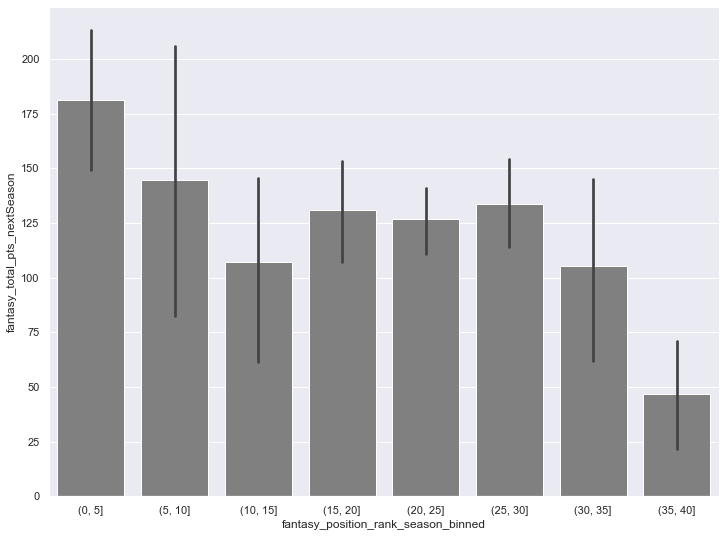

In [10]:
# Set plot parameters
plot_position = 'WR'
plot_x = 'fantasy_position_rank_season'
plot_y = 'fantasy_total_pts_nextSeason'
plot_min_x = 0
plot_max_x = 40
bin_step = 5

binning = True

#=================================================

if binning==True:
    plot_df = column_binner(
        off_agg_df[
            (off_agg_df['position'] == plot_position)& \
            (off_agg_df[plot_x] <= plot_max_x)
        ], 
        plot_x, plot_min_x, plot_max_x, bin_step
    )
    plot_x = plot_x + '_binned'
else:
    plot_df = off_agg_df[(off_agg_df['position']==plot_position)&(off_agg_df[plot_x]<=plot_max_x)]
    
sns.set(rc={'figure.figsize':(12,9)})
plot = sns.barplot(
    data=plot_df, 
    x=plot_x, 
    y=plot_y,
    color='grey'
)